# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [12]:
# Your code here - load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('ames.csv',index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [5]:
# Your code here - drop columns with missing data
df.dropna(axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

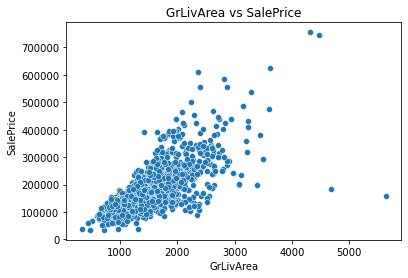

In [13]:
# Your code here - continuous numeric predictor
#GrLiveArea
df['GrLivArea'].nunique()
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()


### Discrete Numeric Predictor

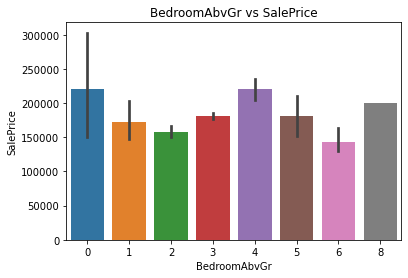

In [19]:
# Your code here - discrete numeric predictor
df['BedroomAbvGr'].value_counts().sort_index()
sns.barplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title('BedroomAbvGr vs SalePrice')
plt.show()


### String Categorical Predictor

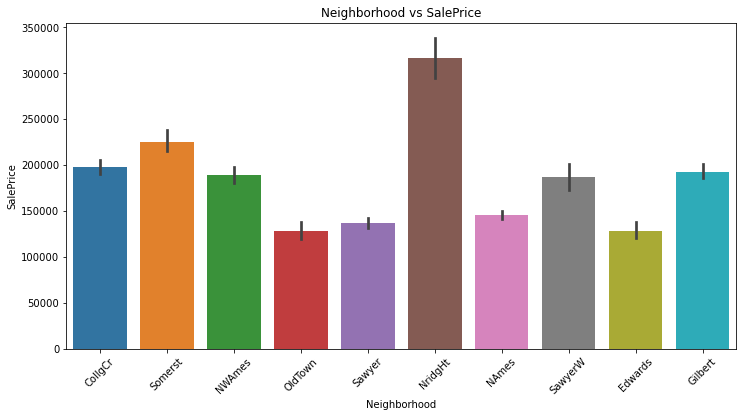

In [18]:
# Your code here - string categorical predictor
df['Neighborhood'].value_counts().head()
top_neighborhoods = df['Neighborhood'].value_counts().head(10).index
filtered_df = df[df['Neighborhood'].isin(top_neighborhoods)]

plt.figure(figsize=(12,6))
sns.barplot(x='Neighborhood', y='SalePrice', data=filtered_df)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation=45)
plt.show()


### Discrete Categorical Predictor

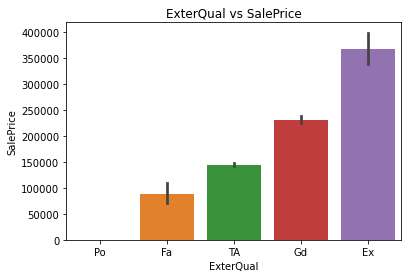

In [17]:
# Your code here - discrete categorical predictor
df['ExterQual'].value_counts()
sns.barplot(x='ExterQual', y='SalePrice', data=df, order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('ExterQual vs SalePrice')
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [28]:
# Your code here - prepare X and y, including one-hot encoding
y = df['SalePrice']
X = df[['GrLivArea','ExterQual','BedroomAbvGr']]

x = pd.get_dummies(X,columns=['ExterQual'], dtype=int)
x = x.drop('ExterQual_TA',axis=1)


In [29]:
# Your answer here - which category or categories were dropped?
"drop the first -'Ex' in the ExterQual column"

"drop the first -'Ex' in the ExterQual column"

In [33]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     651.6
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:19:15   Log-Likelihood:                -17686.
No. Observations:                1460   AIC:                         3.538e+04
Df Residuals:                    1454   BIC:                         3.542e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.014e+04   4499.783     13.365   

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

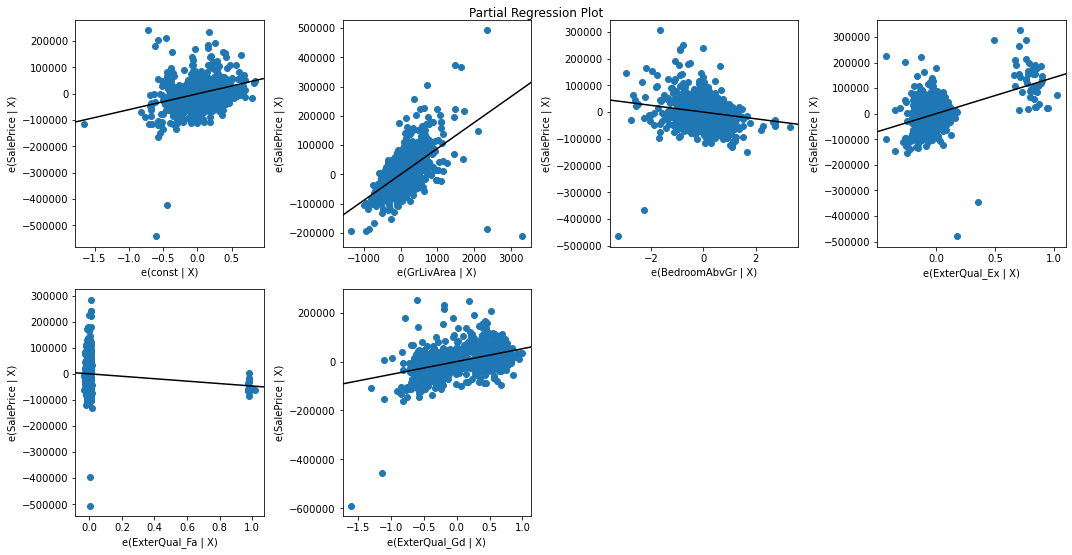

In [34]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(x.columns),
    grid=(4,4),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [35]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_squared_error
mean_squared_error(y, results.predict(sm.add_constant(x)), squared=False)

44114.12596767762

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.